Saving kaggle.json to kaggle (6).json
Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
loan-prediction-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  loan-prediction-problem-dataset.zip
replace test_Y3wMUE5_7gLdaTN.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_Y3wMUE5_7gLdaTN.csv  
replace train_u6lujuX_CVtuZ9i.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_u6lujuX_CVtuZ9i.csv  


Saving kaggle.json to kaggle (7).json
Dataset shape: (614, 13)

Column Names: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Missing values per column:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Remaining missing values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-8-1992050440.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-8-1992050440.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

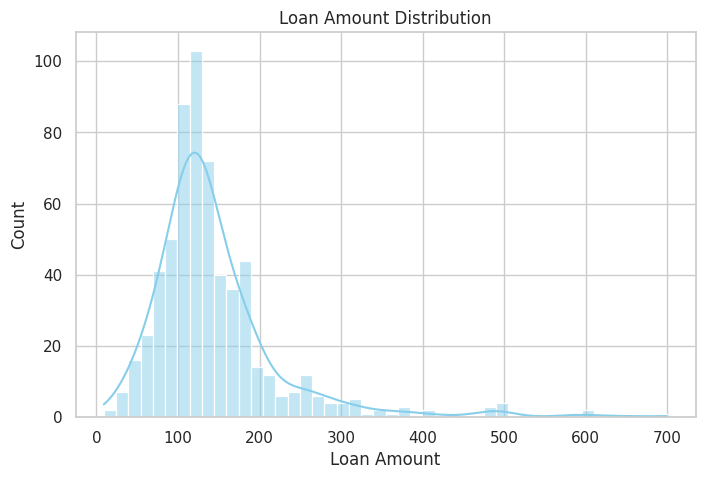

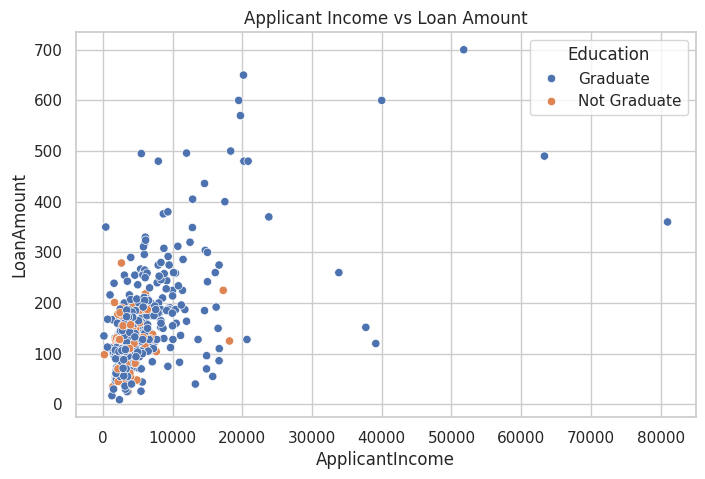

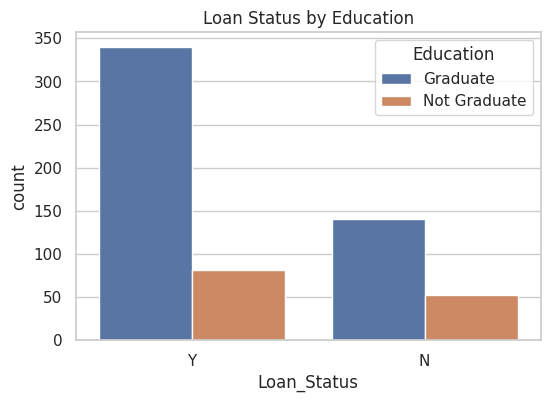

Logistic Regression Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.7073170731707317


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


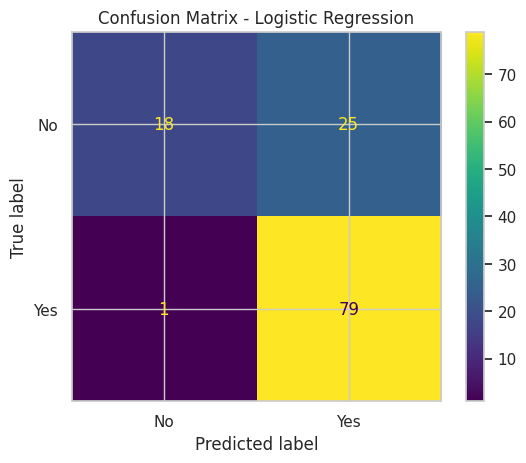

In [8]:
from google.colab import files
files.upload()  # Upload your kaggle.json here

# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip Loan Prediction dataset
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset
!unzip loan-prediction-problem-dataset.zip

import pandas as pd
df = pd.read_csv('train.csv')
df.head()

# ------------------------------
# 1. Importing Required Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

sns.set(style="whitegrid")

# ------------------------------
# 2. Load Dataset
# ------------------------------
from google.colab import files
uploaded = files.upload()  # Upload train.csv here

df = pd.read_csv("train.csv")

# ------------------------------
# 3. Data Overview
# ------------------------------
print("Dataset shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
df.head()

# ------------------------------
# 4. Handling Missing Values
# ------------------------------
# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Fill missing categorical with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Confirm missing values are handled
print("\nRemaining missing values:\n", df.isnull().sum())

# ------------------------------
# 5. Data Visualization
# ------------------------------
# Loan Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], kde=True, color='skyblue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

# Income vs Loan Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'], hue=df['Education'])
plt.title("Applicant Income vs Loan Amount")
plt.show()

# Loan Status by Education
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title("Loan Status by Education")
plt.show()

# ------------------------------
# 6. Preprocessing for Model
# ------------------------------
# Drop 'Loan_ID'
df.drop('Loan_ID', axis=1, inplace=True)

# Convert categorical to numeric using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# ------------------------------
# 7. Model Training
# ------------------------------
# Define features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# ------------------------------
# 8. Evaluation
# ------------------------------
# Accuracy Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

# Confusion Matrix (Logistic Regression)
cm = confusion_matrix(y_test, lr_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

